## Business Context

### Business Context for the Dataset Variables

#### Objective
This dataset is designed to analyze customer financial behavior, assess credit risk, and optimize financial decision-making. It helps financial institutions determine creditworthiness, detect fraud, and provide personalized financial services based on individual customer profiles.

#### Unique Identifiers
- **ID**: Unique identifier for each record.
- **Customer_ID**: Unique identifier for each customer.

#### Time-related Information
- **Month**: Month associated with the financial data.

#### Personal Information
- **Name**: Customer's name.
- **Age**: Customer's age, relevant for creditworthiness.
- **SSN**: Social Security Number, used for identity verification.
- **Occupation**: Customer's profession, impacting income stability.

#### Income and Salary Details
- **Annual_Income**: Total yearly income of the customer.
- **Monthly_Inhand_Salary**: Take-home salary after deductions.

####  Bank and Credit Information
- **Num_Bank_Accounts**: Number of active bank accounts held.
- **Num_Credit_Card**: Total number of credit cards.
- **Interest_Rate**: Interest rate applied to loans.
- **Num_of_Loan**: Total number of loans currently active.
- **Type_of_Loan**: Types of loans taken (e.g., personal, mortgage).

#### Payment and Credit Behavior
- **Delay_from_due_date**: Average number of days payments are delayed.
- **Num_of_Delayed_Payment**: Total number of delayed payments.
- **Changed_Credit_Limit**: Records if and how credit limit changed.
- **Num_Credit_Inquiries**: Number of credit checks requested.
- **Credit_Mix**: Diversity of credit accounts (loans, credit cards, mortgages).
- **Outstanding_Debt**: Total unpaid debt balance.
- **Credit_Utilization_Ratio**: Percentage of available credit used.
- **Credit_History_Age**: Length of time with active credit accounts.
- **Payment_of_Min_Amount**: Indicates if only the minimum amount is paid on credit.

#### Financial Health Indicators
- **Total_EMI_per_month**: Total monthly Equated Monthly Installments (EMIs).
- **Amount_invested_monthly**: Amount invested per month.
- **Payment_Behaviour**: Patterns of how the customer makes payments.
- **Monthly_Balance**: Remaining balance after all expenses and payments.
- **Credit_Score**: Customer's final credit rating (e.g., Excellent, Good, Poor).

#### Use Cases
This dataset can be used for:
- **Credit Risk Assessment**: Evaluating a customer's creditworthiness to determine loan eligibility and interest rates.
- **Fraud Detection**: Identifying suspicious financial behavior and preventing fraudulent activities.
- **Customer Segmentation**: Grouping customers based on financial behavior for personalized marketing strategies.
- **Predictive Modeling**: Using machine learning to forecast credit defaults, payment behavior, and financial risks.
- **Financial Advisory Services**: Providing data-driven recommendations to customers on managing loans, credit cards, and investments.

**Summary:**
This dataset is useful for analyzing customer credit behavior, identifying financial risks, and optimizing financial decision-making for banks and financial institutions.
```


## import package 


In [166]:
import pandas as pd 
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import time

## import data 

In [7]:
data_train= pd.read_csv("C:/Users/Client/Desktop/R studio project/credit_score_project/train.csv")
data_test= pd.read_csv("C:/Users/Client/Desktop/R studio project/credit_score_project/test.csv")
df_test=pd.DataFrame(data_test)
df_train=pd.DataFrame(data_train)
df_train.head()
df_test.head()

C:\Users\Client\AppData\Local\Temp\ipykernel_11532\2394148567.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train= pd.read_csv("C:/Users/Client/Desktop/R studio project/credit_score_project/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## merge data 

In [8]:
data_new = pd.concat([data_train, data_test], axis=0)

data_new.reset_index(drop=True, inplace=True)
data_new.to_csv("webesite_data.csv", index=False)
print(data_new.shape)

(150000, 28)


In [9]:
df=data_new
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [11]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

## data structure 

In [12]:
import pandas as pd

def data_summary(df):
    print("#" * 60)
    print(f"Data Overview\n")
    print(f" Total Rows: {df.shape[0]:,}")
    print(f"Total Columns: {df.shape[1]:,}")
    print(f"Column Names:\n{list(df.columns)}")
    
    print("#" * 60)
    print("\n Data Types Overview")
    print(df.dtypes.value_counts())
    
    # Séparer les colonnes qualitatives et quantitatives
    qualitative_columns = df.select_dtypes(include=["object"]).columns.tolist()
    quantitative_columns = df.select_dtypes(include=["number"]).columns.tolist()
    
    print("\nQualitative Variables:")
    print(qualitative_columns if qualitative_columns else "None")
    
    print("\n Quantitative Variables:")
    print(quantitative_columns if quantitative_columns else "None")
    
    print("\n Missing Values Summary:")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("No missing values 🎉")
    else:
        print(missing_values)
    
    print("#" * 60)
data_summary(df)

############################################################
Data Overview

 Total Rows: 150,000
Total Columns: 28
Column Names:
['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
############################################################

 Data Types Overview
object     20
float64     4
int64       4
Name: count, dtype: int64

Qualitative Variables:
['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstan

In [13]:
def na(df, percent = True):
    srs = df.isna().sum()[df.isna().sum() > 0]
    srs = srs.sort_values(ascending=False)
    if percent:
        print('% of NaNs in df:')
        return srs / df.shape[0]
    else:
        print('# of NaNs in df:')
        return srs

na(df, False)

# of NaNs in df:


Credit_Score               50000
Monthly_Inhand_Salary      22500
Type_of_Loan               17112
Name                       15000
Credit_History_Age         13500
Num_of_Delayed_Payment     10500
Amount_invested_monthly     6750
Num_Credit_Inquiries        3000
Monthly_Balance             1762
dtype: int64

In [14]:
#Calculate the percentage of NaNs per column
na_percentage = (df.isna().sum() / len(df)) * 100

# Filter out columns with no missing values
na_percentage = na_percentage[na_percentage > 0]

# Sort by the percentage of missing values
na_percentage = na_percentage.sort_values(ascending=False)
print(na_percentage)
# Plot the percentage of missing values
plt.figure(figsize=(15, 8))
na_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Credit_Score               33.333333
Monthly_Inhand_Salary      15.000000
Type_of_Loan               11.408000
Name                       10.000000
Credit_History_Age          9.000000
Num_of_Delayed_Payment      7.000000
Amount_invested_monthly     4.500000
Num_Credit_Inquiries        2.000000
Monthly_Balance             1.174667
dtype: float64


NameError: name 'plt' is not defined

## Cleaning data 

### data issues 

In [15]:
df.columns 

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [16]:
import pandas as pd
import re

class DataCleaner:
    def __init__(self, df):
        self.df = df

    def clean_column_names(self):
        """Nettoie les noms de colonnes en remplaçant espaces et caractères spéciaux."""
        self.df.columns = (
            self.df.columns.str.strip()
            .str.lower()
            .str.replace(r'[^a-z0-9_]', '_', regex=True)
        )
        return self

    def clean_numeric_columns(self, numeric_columns):
        """Nettoie uniquement les colonnes qui peuvent contenir des chiffres."""
        for col in numeric_columns:
            if col in self.df.columns and self.df[col].dtype == object:  # Vérifie si la colonne existe et contient du texte
                # Supprime caractères spéciaux et espaces
                self.df[col] = (
                    self.df[col]
                    .astype(str)
                    .str.replace(r'[^0-9.,-]', '', regex=True)  # Garde les nombres négatifs
                    .str.replace(',', '.', regex=True)  # Convertit les virgules en points
                )
                # Convertit en float/int
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        return self 
    def clean_data(self, numeric_columns):
        """Applique les corrections uniquement sur les colonnes numériques spécifiées."""
        return (
            self.clean_column_names()
            .clean_numeric_columns(numeric_columns)
            .df
        )
# Liste des colonnes à traiter
numeric_columns = [
    'age', 'annual_income', 'monthly_inhand_salary',
    'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date',
    'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt',
    'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month',
    'amount_invested_monthly', 'monthly_balance'
]
# Nettoyage
cleaner = DataCleaner(df)
df = cleaner.clean_data(numeric_columns)
print(df) 

             id customer_id      month            name   age          ssn  \
0        0x1602   CUS_0xd40    January   Aaron Maashoh    23  821-00-0265   
1        0x1603   CUS_0xd40   February   Aaron Maashoh    23  821-00-0265   
2        0x1604   CUS_0xd40      March   Aaron Maashoh  -500  821-00-0265   
3        0x1605   CUS_0xd40      April   Aaron Maashoh    23  821-00-0265   
4        0x1606   CUS_0xd40        May   Aaron Maashoh    23  821-00-0265   
...         ...         ...        ...             ...   ...          ...   
149995  0x25fe5  CUS_0x8600   December  Sarah McBridec  4975  031-35-0942   
149996  0x25fee  CUS_0x942c  September           Nicks    25  078-73-5990   
149997  0x25fef  CUS_0x942c    October           Nicks    25  078-73-5990   
149998  0x25ff0  CUS_0x942c   November           Nicks    25  078-73-5990   
149999  0x25ff1  CUS_0x942c   December           Nicks    25  078-73-5990   

       occupation  annual_income  monthly_inhand_salary  num_bank_accounts 

In [17]:
import pandas as pd
import numpy as np

def clean_invalid_values(df):
    """
    Nettoie les colonnes `ssn` et `occupation` en supprimant les valeurs illogiques.
    
    - `ssn`: Doit être un format numérique valide (ex: 123-45-6789)
    - `occupation`: Doit contenir uniquement des lettres (ex: 'Doctor', 'Engineer')
    
    Paramètre:
    df (pd.DataFrame): DataFrame contenant les données à nettoyer.
    
    Retourne:
    df (pd.DataFrame): DataFrame avec les valeurs corrigées.
    """
    
    # --- Nettoyage de la colonne `ssn` ---
    # Vérifier si `ssn` est une série de chiffres valides (on suppose un format XXX-XX-XXXX)
    ssn_pattern = r'^\d{3}-\d{2}-\d{4}$'  
    df['ssn'] = df['ssn'].astype(str)  # Convertir en string si nécessaire
    df.loc[~df['ssn'].str.match(ssn_pattern, na=False), 'ssn'] = np.nan  # Remplacer les valeurs invalides par NaN

    # --- Nettoyage de la colonne `occupation` ---
    # Vérifier si `occupation` contient uniquement des lettres
    occupation_pattern = r'^[A-Za-z\s]+$'  # Seules les lettres et espaces sont autorisés
    df['occupation'] = df['occupation'].astype(str)  # Convertir en string si nécessaire
    df.loc[~df['occupation'].str.match(occupation_pattern, na=False), 'occupation'] = np.nan  # Remplacer les valeurs invalides

    return df
df = clean_invalid_values(df)


In [18]:
import pandas as pd
import numpy as np

class FinancialDataCleaner:
    def __init__(self, df):
        self.df = df.copy()

    def correct_financial_values(self):
        """Corrige les valeurs illogiques en se basant sur des règles financières."""
        # Définition des seuils financiers logiques
        rules = {
            "age": (18, 100),  # Âge réaliste entre 18 et 100 ans
            "annual_income": (5000, 1000000),  # Salaire annuel entre 5k et 1M
            "monthly_inhand_salary": (500, 50000),  # Salaire mensuel entre 500 et 50k
            "num_bank_accounts": (0, 20),  # Nombre de comptes bancaires réaliste
            "num_credit_card": (0, 15),  # Nombre de cartes de crédit max 15
            "interest_rate": (0, 100),  # Taux d’intérêt entre 0% et 100%
            "num_of_loan": (0, 10),  # Nombre de prêts max 10
            "delay_from_due_date": (0, 365),  # Retard max d'un an
            "num_of_delayed_payment": (0, 50),  # Nombre max de paiements en retard
            "changed_credit_limit": (-50000, 50000),  # Changement de crédit max +/- 50k
            "num_credit_inquiries": (0, 50),  # Nombre d'enquêtes de crédit
            "outstanding_debt": (0, 1000000),  # Dette max de 1M
            "credit_utilization_ratio": (0, 100),  # Ratio entre 0% et 100%
            "credit_history_age": (0, 50),  # Historique de crédit max 50 ans
            "total_emi_per_month": (0, 50000),  # Paiement EMI mensuel max 50k
            "amount_invested_monthly": (0, 50000),  # Investissement mensuel max 50k
            "monthly_balance": (-10000, 100000)  # Balance mensuelle réaliste
        }

        for col, (min_val, max_val) in rules.items():
            if col in self.df.columns:
                # Supprime les valeurs négatives impossibles (comme un âge < 0)
                self.df[col] = np.where(self.df[col] < min_val, np.nan, self.df[col])
                self.df[col] = np.where(self.df[col] > max_val, np.nan, self.df[col])

                # Remplace les valeurs aberrantes par la médiane
                median_value = self.df[col].median(skipna=True)
                self.df[col].fillna(median_value, inplace=True)

        return self

    def clean_data(self):
        """Applique toutes les corrections."""
        return (
            self.correct_financial_values()
            .df
        )
# Nettoyage
cleaner = FinancialDataCleaner(df)
df = cleaner.clean_data()

print(df)


             id customer_id      month            name   age          ssn  \
0        0x1602   CUS_0xd40    January   Aaron Maashoh  23.0  821-00-0265   
1        0x1603   CUS_0xd40   February   Aaron Maashoh  23.0  821-00-0265   
2        0x1604   CUS_0xd40      March   Aaron Maashoh  34.0  821-00-0265   
3        0x1605   CUS_0xd40      April   Aaron Maashoh  23.0  821-00-0265   
4        0x1606   CUS_0xd40        May   Aaron Maashoh  23.0  821-00-0265   
...         ...         ...        ...             ...   ...          ...   
149995  0x25fe5  CUS_0x8600   December  Sarah McBridec  34.0  031-35-0942   
149996  0x25fee  CUS_0x942c  September           Nicks  25.0  078-73-5990   
149997  0x25fef  CUS_0x942c    October           Nicks  25.0  078-73-5990   
149998  0x25ff0  CUS_0x942c   November           Nicks  25.0  078-73-5990   
149999  0x25ff1  CUS_0x942c   December           Nicks  25.0  078-73-5990   

       occupation  annual_income  monthly_inhand_salary  num_bank_accounts 

###  missing values 

In [19]:
df.isna().sum() 

id                              0
customer_id                     0
month                           0
name                        15000
age                             0
ssn                          8400
occupation                  19862
annual_income                   0
monthly_inhand_salary           0
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                17112
delay_from_due_date             0
num_of_delayed_payment          0
changed_credit_limit            0
num_credit_inquiries            0
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age              0
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly         0
payment_behaviour               0
monthly_balance                 0
credit_score                50000
dtype: int64

In [20]:
class MissingDataHandler:
    def __init__(self, df):
        self.df = df  # Appliquer les changements directement sur le DataFrame original
    # 1. Supprimer les colonnes avec trop de valeurs manquantes
    def drop_column(self, threshold=0.5):
        """Drop columns with more than threshold% missing values."""
        self.df.dropna(thresh=len(self.df) * (1 - threshold), axis=1, inplace=True)
    # 2. Supprimer les lignes avec des valeurs manquantes
    def drop_row(self):
        """Drop rows with any missing values."""
        self.df.dropna(inplace=True)
    # 3. Imputation avec la moyenne ou la médiane
    def impute_mean_median(self, strategy='mean'):
        """Impute missing values in all numerical columns with mean or median."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            imputer = SimpleImputer(strategy=strategy)
            self.df[col] = imputer.fit_transform(self.df[[col]])
    
    def group_imputation(self, group_by, strategy='mean'):
        """Group-wise imputation using mean or median for all numerical columns."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            self.df[col].fillna(self.df.groupby(group_by)[col].transform(strategy), inplace=True)
    # 4. Remplir par la valeur la plus fréquente (catégories)
    def impute_categorical(self, strategy='most_frequent', fill_value=None):
        """Impute missing values in all categorical columns."""
        cat_cols = self.df.select_dtypes(exclude=[np.number]).columns
        for col in cat_cols:
            if strategy == 'constant' and fill_value is not None:
                self.df[col].fillna(fill_value, inplace=True)
            else:
                imputer = SimpleImputer(strategy=strategy)
                self.df[col] = imputer.fit_transform(self.df[[col]]).ravel()
    # 5. Remplissage en avant et en arrière
    def forward_fill(self):
        """Forward fill missing values for all columns."""
        self.df.fillna(method='ffill', inplace=True)
    
    def backward_fill(self):
        """Backward fill missing values for all columns."""
        self.df.fillna(method='bfill', inplace=True)
    # 6. Interpolation (utile pour les séries temporelles)
    def interpolate(self, method='linear'):
        """Interpolate missing values for all numerical columns."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            self.df[col].interpolate(method=method, inplace=True)
    # using KNN for all numerical columns
    def knn_imputation(self, n_neighbors=5):
        """Impute missing values using KNN for all numerical columns."""
        imputer = KNNImputer(n_neighbors=n_neighbors)
        self.df[:] = imputer.fit_transform(self.df)
    # using Iterative Imputer (MICE)
    def iterative_imputation(self):
        """Impute missing values using Iterative Imputer (MICE) for all numerical columns."""
        imputer = IterativeImputer()
        self.df[:] = imputer.fit_transform(self.df)
    
    def get_dataframe(self):
        """Return the processed DataFrame."""
        return self.df

In [21]:
# Importer la classe
handler = MissingDataHandler(df)
# Supprimer les colonnes avec plus de 50% de valeurs manquantes
handler.drop_column(threshold=0.9)
# Imputation des valeurs manquantes
handler.impute_mean_median(strategy='median')  # Impute par la moyenne pour les colonnes numériques
handler.impute_categorical(strategy='most_frequent')  # Impute par la valeur la plus fréquente pour les catégoriques
# Utiliser forward fill ou backward fill si nécessaire
handler.forward_fill()
# Récupérer le DataFrame traité
cleaned_df = handler.get_dataframe()
print("\nDataFrame après traitement :")
cleaned_df.info()
df=cleaned_df
df.describe()

NameError: name 'SimpleImputer' is not defined

###  Removing duplicates rows

In [ ]:
def remove_duplicates(df, subset=None, keep='first', inplace=False):
    """
    Removes duplicate rows from the DataFrame and provides a summary of duplicates.
    Parameters:
        df (pd.DataFrame): The DataFrame from which to remove duplicates.
        subset (list): List of columns to consider for duplicate checking. 
                    If None, checks all columns.
        keep (str): Which duplicates to keep. Options:
            - 'first': Keep the first occurrence (default).
            - 'last': Keep the last occurrence.
            - 'none': Drop all duplicates.
        inplace (bool): If True, modifies the original DataFrame. 
                        If False, returns a new DataFrame.
    Returns:
        pd.DataFrame: DataFrame with duplicates removed (if inplace=False).
    """
    if keep not in ['first', 'last', 'none']:
        raise ValueError("keep must be one of 'first', 'last', or 'none'.")
    # Count duplicates before removal
    total_rows = len(df)
    duplicate_rows = df.duplicated(subset=subset, keep=False).sum()
    percentage_duplicates = (duplicate_rows / total_rows) * 100
    print(f"Total Rows: {total_rows}")
    print(f"Duplicate Rows: {duplicate_rows} ({percentage_duplicates:.2f}%)")
    if duplicate_rows == 0:
        print("No duplicates found. No rows removed.")
        return df if not inplace else None
    # Handle duplicate removal    if keep == 'none':
        # Drop all duplicates and keep only unique rows
        duplicated_mask = df.duplicated(subset=subset, keep=False)
        result = df[~duplicated_mask]
    else:
        # Use pandas built-in drop_duplicates
        result = df.drop_duplicates(subset=subset, keep=keep)
    # Count duplicates after removal
    remaining_rows = len(result)
    rows_removed = total_rows - remaining_rows
    print(f"Rows Removed: {rows_removed}")
    print(f"Remaining Rows: {remaining_rows}")
    if rows_removed > 0:
        print("Duplicates successfully removed.")
    else:
        print("No duplicates were removed.")
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return result
remove_duplicates(df, subset=None, keep='first', inplace=False)

Total Rows: 150000
Duplicate Rows: 0 (0.00%)
No duplicates found. No rows removed.


,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,26.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3119.696667,3.0,...,Good,809.98,31.944960,26.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,34.0,821-00-0265,Scientist,19114.12,3119.696667,3.0,...,Good,809.98,28.609352,26.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3119.696667,3.0,...,Good,809.98,31.377862,26.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,26.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,34.0,031-35-0942,Architect,20002.88,1929.906667,10.0,...,_,3571.70,34.780553,26.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,Standard
149996,0x25fee,CUS_0x942c,September,Nicks,25.0,078-73-5990,Mechanic,39628.99,3119.696667,4.0,...,Good,502.38,27.758522,26.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,Standard
149997,0x25fef,CUS_0x942c,October,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,26.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,Standard
149998,0x25ff0,CUS_0x942c,November,Nicks,25.0,078-73-5990,Mechanic,39628.99,3119.696667,4.0,...,Good,502.38,39.139840,26.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,Standard


### outliers 

In [ ]:
class DataCleaner:
    def __init__(self, df):
        """
        Initializes the class with a DataFrame.
        
        Parameters:
            df (pd.DataFrame): The dataset to be cleaned.
        """
        self.df = df
        self.numeric_columns = self.df.select_dtypes(include=['number']).columns.to_list()

    def remove_na_inf(self):
        """Replaces infinite values with NaN and drops rows containing NaN."""
        self.df[self.numeric_columns] = self.df[self.numeric_columns].replace([np.inf, -np.inf], np.nan).dropna()
        print(" NaN and infinite values removed.")

    def detect_outliers_iqr(self):
        """
        Detects outliers using the Interquartile Range (IQR) method.
        
        Returns:
            A dictionary containing outlier indices for each column.
        """
        outliers_dict = {}

        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outlier indices
            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)].index
            outliers_dict[col] = outliers

        return outliers_dict

    def drop_outliers(self):
        """Drops rows containing outliers based on the IQR method."""
        outliers_dict = self.detect_outliers_iqr()
        outlier_indices = set(index for indices in outliers_dict.values() for index in indices)
        self.df = self.df.drop(outlier_indices)
        print(" Outliers removed.")

    def replace_outliers_iqr(self):
        """Replaces outliers with the lower and upper IQR bounds (Winsorization)."""
        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            self.df[col] = np.where(self.df[col] < lower_bound, lower_bound, self.df[col])
            self.df[col] = np.where(self.df[col] > upper_bound, upper_bound, self.df[col])
        
        print(" Outliers replaced using IQR bounds.")

    def replace_outliers_median(self):
        """Replaces outliers with the column median."""
        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median_value = self.df[col].median()

            self.df[col] = np.where((self.df[col] < lower_bound) | (self.df[col] > upper_bound), median_value, self.df[col])
        
        print(" Outliers replaced with median.")

    def replace_outliers_knn(self, n_neighbors=5):
        """Replaces outliers using K-Nearest Neighbors (KNN) imputation."""
        imputer = KNNImputer(n_neighbors=n_neighbors)
        self.df[self.numeric_columns] = imputer.fit_transform(self.df[self.numeric_columns])
        print(" Outliers replaced using KNN imputation.")

    def save_cleaned_data(self, filename="cleaned_data.csv"):
        """Saves the cleaned DataFrame as a CSV file."""
        self.df.to_csv(filename, index=False)
        print(f" Cleaned data saved to {filename}.")

    def clean_data(self, method="median"):
        """
        Cleans missing values and applies an outlier handling method.

        Parameters:
            method (str): The method to handle outliers ('drop', 'winsorization', 'median', 'knn').
        """
        self.remove_na_inf()  # Remove NaN and infinite values

        if method == "drop":
            self.drop_outliers()
        elif method == "winsorization":
            self.replace_outliers_iqr()
        elif method == "median":
            self.replace_outliers_median()
        elif method == "knn":
            self.replace_outliers_knn()
        else:
            print("Invalid method. Choose from 'drop', 'winsorization', 'median', 'knn'.")

        self.save_cleaned_data()


In [ ]:
# Initialisation du DataCleaner
cleaner = DataCleaner(df)
# Nettoyage des données avec la méthode choisie
cleaner.clean_data(method="median")  

 NaN and infinite values removed.
 Outliers replaced with median.
 Cleaned data saved to cleaned_data.csv.


### Data type conversions

In [ ]:
class DataTypeConverter:
    def __init__(self, df):
        """
        Initializes the class with a DataFrame.
        
        Parameters:
            df (pd.DataFrame): The dataset to be converted.
        """
        self.df = df 

    def convert_data_types(self):
        """
        Converts column data types based on their values:
        - Converts strings containing numbers to int/float.
        - Converts float columns with only integer values to int.
        - Converts boolean-like columns (0/1) to bool.
        - Converts date-like columns to datetime.
        - Converts categorical columns (few unique values) to category.
        """
        for col in self.df.columns:
            # Convert numeric strings to proper numbers
            if self.df[col].dtype == 'object':
                try:
                    self.df[col] = pd.to_numeric(self.df[col])
                except ValueError:
                    pass  # Keep as object if conversion fails

            # Convert float columns with only integer values to int
            if self.df[col].dtype == 'float64':
                if (self.df[col].dropna() % 1 == 0).all():
                    self.df[col] = self.df[col].astype(int)

            # Convert boolean-like columns (0/1) to bool
            if set(self.df[col].dropna().unique()) == {0, 1}:
                self.df[col] = self.df[col].astype(bool)

            # Convert date-like columns to datetime
            if self.df[col].dtype == 'object':
                try:
                    self.df[col] = pd.to_datetime(self.df[col])
                except ValueError:
                    pass  # Keep as object if not a valid date format
            
            # Convert categorical columns (few unique values) to category
            if self.df[col].dtype == 'object' and self.df[col].nunique() / len(self.df) < 0.05:
                self.df[col] = self.df[col].astype('category')

        print(" Data types converted successfully.")

    def get_dataframe(self):
        """Returns the converted DataFrame."""
        return self.df

In [ ]:
# Initialize DataTypeConverter
converter = DataTypeConverter(df)

# Convert data types
converter.convert_data_types()

# Get the transformed DataFrame
df_converted = converter.get_dataframe()

C:\Users\Client\AppData\Local\Temp\ipykernel_11496\3453405458.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\Client\AppData\Local\Temp\ipykernel_11496\3453405458.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\Client\AppData\Local\Temp\ipykernel_11496\3453405458.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\Client\AppData\Local\Temp\ipykernel_11496\3453405458.py:40: UserWarning: Could not infer forma

 Data types converted successfully.


C:\Users\Client\AppData\Local\Temp\ipykernel_11496\3453405458.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])


## Analyse univarie 

### numerical variables 

In [62]:
dtypes['dtype'] = dtypes['dtype'].astype(str)  # Convertit les dtypes en string
print('Df dtypes:')
print(dtypes.groupby('dtype').size())

Df dtypes:
dtype
category    7
float64     8
int32       9
object      4
dtype: int64


In [63]:
def numeric_analysis(df):
        return print(df.describe().T)
numeric_analysis(df)

                             count          mean           std          min  \
age                       150000.0     34.506213      9.711813    18.000000   
annual_income             150000.0  47775.158117  34369.901183  7005.930000   
monthly_inhand_salary     150000.0   3628.638400   2314.484010   500.417917   
num_bank_accounts         150000.0      5.364260      2.575788     0.000000   
num_credit_card           150000.0      5.520833      2.046918     0.000000   
interest_rate             150000.0     14.500953      8.655835     1.000000   
num_of_loan               150000.0      3.510880      2.395156     0.000000   
delay_from_due_date       150000.0     19.532460     12.530683     0.000000   
num_of_delayed_payment    150000.0     13.467593      5.944468     0.000000   
changed_credit_limit      150000.0     10.119565      6.364913    -6.490000   
num_credit_inquiries      150000.0      6.272713      3.883406     0.000000   
outstanding_debt          150000.0   1249.626768    

In [64]:
def univariate_analysis(df, base_folder="univariate_analysis"):
        # Ensure the base folder exists
        if not os.path.exists(base_folder):
            os.makedirs(base_folder)
        
        # Select numeric columns
        numeric_cols = df.select_dtypes(include=['number']).columns
        
        for col in numeric_cols:
            # Create a folder for the analysis
            col_folder = os.path.join(base_folder, col)
            if not os.path.exists(col_folder):
                os.makedirs(col_folder)
            
            print(f"\nPerforming Univariate Analysis for: {col}")
            
            # Create a single figure with 2x2 layout
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
            
            # Bar Chart
            sns.barplot(
                x=df[col].value_counts().index, 
                y=df[col].value_counts().values, 
                palette="viridis", 
                ax=axes[0, 0]
            )
            axes[0, 0].set_title('Bar Chart')
            axes[0, 0].set_xlabel(col)
            axes[0, 0].set_ylabel('Frequency')
            
            # Box Plot
            sns.boxplot(y=df[col], palette="viridis", ax=axes[0, 1])
            axes[0, 1].set_title('Box Plot')
            axes[0, 1].set_xlabel(col)
            
            # Density Plot
            sns.kdeplot(df[col], fill=True, color="blue", alpha=0.6, ax=axes[1, 0])
            axes[1, 0].set_title('Density Plot')
            axes[1, 0].set_xlabel(col)
            axes[1, 0].set_ylabel('Density')
            
            # Histogram
            sns.histplot(df[col], kde=False, color="green", ax=axes[1, 1])
            axes[1, 1].set_title('Histogram')
            axes[1, 1].set_xlabel(col)
            axes[1, 1].set_ylabel('Frequency')
            
            # Adjust layout
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
            
            # Save the combined plot
            combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
            plt.savefig(combined_plot_path, bbox_inches='tight')
            plt.close()
            
            print(f"Combined plots for {col} saved in: {combined_plot_path}")

In [ ]:
univariate_analysis(df, base_folder="univariate_analysis")


Performing Univariate Analysis for: age


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for age saved in: univariate_analysis\age\age_univariate_analysis.png

Performing Univariate Analysis for: annual_income


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for annual_income saved in: univariate_analysis\annual_income\annual_income_univariate_analysis.png

Performing Univariate Analysis for: monthly_inhand_salary


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for monthly_inhand_salary saved in: univariate_analysis\monthly_inhand_salary\monthly_inhand_salary_univariate_analysis.png

Performing Univariate Analysis for: num_bank_accounts


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for num_bank_accounts saved in: univariate_analysis\num_bank_accounts\num_bank_accounts_univariate_analysis.png

Performing Univariate Analysis for: num_credit_card


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for num_credit_card saved in: univariate_analysis\num_credit_card\num_credit_card_univariate_analysis.png

Performing Univariate Analysis for: interest_rate


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for interest_rate saved in: univariate_analysis\interest_rate\interest_rate_univariate_analysis.png

Performing Univariate Analysis for: num_of_loan


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for num_of_loan saved in: univariate_analysis\num_of_loan\num_of_loan_univariate_analysis.png

Performing Univariate Analysis for: delay_from_due_date


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for delay_from_due_date saved in: univariate_analysis\delay_from_due_date\delay_from_due_date_univariate_analysis.png

Performing Univariate Analysis for: num_of_delayed_payment


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for num_of_delayed_payment saved in: univariate_analysis\num_of_delayed_payment\num_of_delayed_payment_univariate_analysis.png

Performing Univariate Analysis for: changed_credit_limit


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for changed_credit_limit saved in: univariate_analysis\changed_credit_limit\changed_credit_limit_univariate_analysis.png

Performing Univariate Analysis for: num_credit_inquiries


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for num_credit_inquiries saved in: univariate_analysis\num_credit_inquiries\num_credit_inquiries_univariate_analysis.png

Performing Univariate Analysis for: outstanding_debt


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for outstanding_debt saved in: univariate_analysis\outstanding_debt\outstanding_debt_univariate_analysis.png

Performing Univariate Analysis for: credit_utilization_ratio


### categorical variables 

In [26]:
def categorical_analysis(df):
    return print(df.select_dtypes(include='object').describe().T)
categorical_analysis(df)

                        count  unique                             top   freq
id                     150000  150000                          0x1602      1
customer_id            150000   12500                       CUS_0xd40     12
month                  150000      12                         January  12500
name                   135000   10139                          Stevex     66
ssn                    141600   12500                     078-73-5990     12
occupation             130138      14                          Lawyer   9899
type_of_loan           132888    6260                   Not Specified   2112
credit_mix             150000       4                        Standard  54858
payment_of_min_amount  150000       3                             Yes  78484
payment_behaviour      150000       7  Low_spent_Small_value_payments  38207
credit_score           100000       3                        Standard  53174


In [30]:
len(df["type_of_loan"].unique())

6261

In [31]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical"):
    """
    Perform univariate analysis on categorical variables by generating:
    - A count plot (bar chart)
    - A pie chart

    Parameters:
        df (pd.DataFrame): DataFrame to analyze.
        base_folder (str): Folder to save the generated images.
    """
    os.makedirs(base_folder, exist_ok=True)  # Create base folder if not exists

    # Select categorical columns
    # Liste des colonnes à exclure
    exclude_cols = {'id', 'customer_id', 'type_of_loan', 'name', 'ssn'}
    # Sélection des colonnes catégorielles sans celles à exclure
    categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in exclude_cols]
    for col in categorical_cols:
        print(f"\nPerforming Univariate Analysis for: {col}")

        # Create folder for each variable
        col_folder = os.path.join(base_folder, col)
        os.makedirs(col_folder, exist_ok=True)

        # Drop NaN values for visualization
        col_data = df[col].dropna()

        # Create figure
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)

        # Count Plot (Bar Chart)
        sns.countplot(
            x=col_data, 
            order=col_data.value_counts().index,  # Order by frequency
            palette="viridis", 
            ax=axes[0]
        )
        axes[0].set_title('Count Plot')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        plt.xticks(rotation=45)

        # Pie Chart
        explode_values = [0.05] * len(col_data.unique())  # Small separation between slices
        col_data.value_counts().plot.pie(
            autopct='%1.1f%%', 
            colors=sns.color_palette("viridis", len(col_data.unique())),
            explode=explode_values,
            ax=axes[1]
        )
        axes[1].set_title('Pie Chart')
        axes[1].set_ylabel('')  # Remove y-label for better visualization

        # Save the figure
        plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()

        print(f"Saved: {plot_path}")

univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical")



Performing Univariate Analysis for: month
Saved: univariate_analysis_categorical\month\month_univariate_analysis.png

Performing Univariate Analysis for: occupation
Saved: univariate_analysis_categorical\occupation\occupation_univariate_analysis.png

Performing Univariate Analysis for: credit_mix
Saved: univariate_analysis_categorical\credit_mix\credit_mix_univariate_analysis.png

Performing Univariate Analysis for: payment_of_min_amount
Saved: univariate_analysis_categorical\payment_of_min_amount\payment_of_min_amount_univariate_analysis.png

Performing Univariate Analysis for: payment_behaviour
Saved: univariate_analysis_categorical\payment_behaviour\payment_behaviour_univariate_analysis.png

Performing Univariate Analysis for: credit_score
Saved: univariate_analysis_categorical\credit_score\credit_score_univariate_analysis.png


## Multyvarie Analysis

In [37]:
target = "credit_score"

### multivariate analysis with respect to the target variable

In [20]:
print(df["credit_score"].value_counts(normalize=True) * 100)

credit_score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

def multivariate_analysis(target, df, base_folder="multivariate_analysis", sample_frac=0.2):
    """
    Performs multivariate analysis with respect to the target variable.
    Outputs:
        - Categorical vs Target: Box plots or count plots.
        - Numeric vs Target: Scatter plots with density curves.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the analysis images.
        sample_frac (float): Fraction of data to sample for faster plotting.
    """
    # Ensure the base folder exists
    os.makedirs(base_folder, exist_ok=True)
    
    # Select categorical and numeric columns
    exclude_cols = {'id', 'customer_id', 'type_of_loan', 'name', 'ssn'}
    categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in exclude_cols]
    numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols and col != target]
    
    # --- Categorical vs Target ---
    cat_vs_target_folder = os.path.join(base_folder, "categorical_vs_target")
    os.makedirs(cat_vs_target_folder, exist_ok=True)
    
    def plot_categorical_vs_target(col):
        print(f"Analyzing Categorical vs Target: {target} vs {col}")
        
        plt.figure(figsize=(10, 6))
        if pd.api.types.is_numeric_dtype(df[target]):
            sns.boxplot(x=col, y=target, data=df)
            plt.title(f"{target} Distribution by {col}")
        else:
            sns.countplot(x=col, hue=target, data=df)
            plt.title(f"Count of {col} by {target}")
        plt.xlabel(col)
        plt.ylabel(target if pd.api.types.is_numeric_dtype(df[target]) else "Count")
        
        plot_path = os.path.join(cat_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        print(f"Saved: {plot_path}")
    
    # Parallelize the plotting for categorical vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_categorical_vs_target, categorical_cols)
    
    # --- Numeric vs Target ---
    num_vs_target_folder = os.path.join(base_folder, "numeric_vs_target")
    os.makedirs(num_vs_target_folder, exist_ok=True)
    
    # Sample the data for faster plotting
    sampled_df = df.sample(frac=sample_frac, random_state=42)
    
    def plot_numeric_vs_target(col):
        print(f"Analyzing Numeric vs Target: {target} vs {col}")
        
        plt.figure(figsize=(10, 6))
        if pd.api.types.is_numeric_dtype(df[target]):
            sns.scatterplot(x=target, y=col, data=sampled_df, alpha=0.4, color='purple')
            sns.kdeplot(x=target, y=col, data=sampled_df, color="red", levels=3, linewidths=1)
            plt.title(f"{target} vs {col} (Scatter + Density)")
        else:
            sns.boxplot(x=target, y=col, data=sampled_df)
            plt.title(f"{col} Distribution by {target}")
        plt.xlabel(target)
        plt.ylabel(col)
        
        plot_path = os.path.join(num_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        print(f"Saved: {plot_path}")
    
    # Parallelize the plotting for numeric vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_numeric_vs_target, numeric_cols)
    
    print("\n Multivariate Analysis Completed Successfully!")


In [26]:
multivariate_analysis(target, df, base_folder="multivariate_analysis", sample_frac=0.2)

Analyzing Categorical vs Target: credit_score vs monthAnalyzing Categorical vs Target: credit_score vs occupation

Analyzing Categorical vs Target: credit_score vs credit_mix
Analyzing Categorical vs Target: credit_score vs payment_of_min_amount
Analyzing Categorical vs Target: credit_score vs payment_behaviour
Analyzing Categorical vs Target: credit_score vs credit_score
Saved: multivariate_analysis\categorical_vs_target\credit_score_vs_payment_of_min_amount.png
Saved: multivariate_analysis\categorical_vs_target\credit_score_vs_credit_mix.png
Saved: multivariate_analysis\categorical_vs_target\credit_score_vs_payment_behaviour.png
Saved: multivariate_analysis\categorical_vs_target\credit_score_vs_month.png
Saved: multivariate_analysis\categorical_vs_target\credit_score_vs_credit_score.png
Analyzing Numeric vs Target: credit_score vs age
Analyzing Numeric vs Target: credit_score vs annual_income
Analyzing Numeric vs Target: credit_score vs monthly_inhand_salary
Analyzing Numeric vs Targ

### Multyvarie Analysis advanced

In [ ]:
def scatter_plot_combinations(target, df, base_folder="scatter_combinations"):
    """
    Generates scatter plots for all possible combinations between the target variable,
    one categorical variable, and one numerical variable.
    Outputs:
        - Scatter plots showing the relationship between target and numerical variable,
        colored by the categories of the categorical variable.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the scatter plots.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical and numeric columns
    exclude_cols = {'id', 'customer_id', 'type_of_loan', 'name', 'ssn'}
    categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in exclude_cols]
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Iterate through all combinations of categorical and numerical variables
    for cat_col in categorical_cols:
        if cat_col != target:  # Skip the target itself
            for num_col in numeric_cols:
                if num_col != target:  # Skip the target itself
                    print(f"\nCreating Scatter Plot: Target={target}, Categorical={cat_col}, Numerical={num_col}")
                    
                    # Plot
                    plt.figure(figsize=(10, 6))
                    sns.scatterplot(
                        x=num_col, 
                        y=target, 
                        hue=cat_col, 
                        data=df, 
                        palette="viridis", 
                        alpha=0.6
                    )
                    plt.title(f'{target} vs {num_col} by {cat_col}')
                    plt.xlabel(num_col)
                    plt.ylabel(target)
                    plt.legend(title=cat_col)
                    
                    # Save plot
                    plot_folder = os.path.join(base_folder, f"{target}_vs_{num_col}_by_{cat_col}")
                    if not os.path.exists(plot_folder):
                        os.makedirs(plot_folder)
                    plot_path = os.path.join(plot_folder, f"{target}_vs_{num_col}_by_{cat_col}.png")
                    plt.savefig(plot_path, bbox_inches='tight')
                    plt.close()
                    
                    print(f"Scatter Plot saved in: {plot_path}")
scatter_plot_combinations(target, df, base_folder="scatter_combinations")


Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=age


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_age_by_month\credit_score_vs_age_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=annual_income


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_annual_income_by_month\credit_score_vs_annual_income_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=monthly_inhand_salary


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_monthly_inhand_salary_by_month\credit_score_vs_monthly_inhand_salary_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=num_bank_accounts


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_num_bank_accounts_by_month\credit_score_vs_num_bank_accounts_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=num_credit_card


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_num_credit_card_by_month\credit_score_vs_num_credit_card_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=interest_rate


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_interest_rate_by_month\credit_score_vs_interest_rate_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=num_of_loan


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_num_of_loan_by_month\credit_score_vs_num_of_loan_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=delay_from_due_date


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_delay_from_due_date_by_month\credit_score_vs_delay_from_due_date_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=num_of_delayed_payment


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_num_of_delayed_payment_by_month\credit_score_vs_num_of_delayed_payment_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=changed_credit_limit


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_changed_credit_limit_by_month\credit_score_vs_changed_credit_limit_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=num_credit_inquiries


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_num_credit_inquiries_by_month\credit_score_vs_num_credit_inquiries_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=outstanding_debt


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_outstanding_debt_by_month\credit_score_vs_outstanding_debt_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=credit_utilization_ratio


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_credit_utilization_ratio_by_month\credit_score_vs_credit_utilization_ratio_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=credit_history_age
Scatter Plot saved in: scatter_combinations\credit_score_vs_credit_history_age_by_month\credit_score_vs_credit_history_age_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=total_emi_per_month


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_total_emi_per_month_by_month\credit_score_vs_total_emi_per_month_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=amount_invested_monthly


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_amount_invested_monthly_by_month\credit_score_vs_amount_invested_monthly_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=month, Numerical=monthly_balance


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_monthly_balance_by_month\credit_score_vs_monthly_balance_by_month.png

Creating Scatter Plot: Target=credit_score, Categorical=occupation, Numerical=age


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_age_by_occupation\credit_score_vs_age_by_occupation.png

Creating Scatter Plot: Target=credit_score, Categorical=occupation, Numerical=annual_income


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_annual_income_by_occupation\credit_score_vs_annual_income_by_occupation.png

Creating Scatter Plot: Target=credit_score, Categorical=occupation, Numerical=monthly_inhand_salary


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_monthly_inhand_salary_by_occupation\credit_score_vs_monthly_inhand_salary_by_occupation.png

Creating Scatter Plot: Target=credit_score, Categorical=occupation, Numerical=num_bank_accounts


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_num_bank_accounts_by_occupation\credit_score_vs_num_bank_accounts_by_occupation.png

Creating Scatter Plot: Target=credit_score, Categorical=occupation, Numerical=num_credit_card


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_num_credit_card_by_occupation\credit_score_vs_num_credit_card_by_occupation.png

Creating Scatter Plot: Target=credit_score, Categorical=occupation, Numerical=interest_rate


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_interest_rate_by_occupation\credit_score_vs_interest_rate_by_occupation.png

Creating Scatter Plot: Target=credit_score, Categorical=occupation, Numerical=num_of_loan


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


Scatter Plot saved in: scatter_combinations\credit_score_vs_num_of_loan_by_occupation\credit_score_vs_num_of_loan_by_occupation.png

Creating Scatter Plot: Target=credit_score, Categorical=occupation, Numerical=delay_from_due_date


C:\Users\Client\AppData\Local\Temp\ipykernel_2944\2783337156.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(plot_path, bbox_inches='tight')


KeyboardInterrupt: 

c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


### correlation matrix 

In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Supprimer les lignes contenant des NaN ou des inf
column_headers = df.columns.to_list()
quantitative_columns = [col for col in column_headers if df[col].dtype in ['int64', 'float64']]

# Nettoyage des valeurs infinies et manquantes
cleaned_df = df[quantitative_columns].replace([np.inf, -np.inf], np.nan).dropna()

# Vérifier si les valeurs infinies ou NaN ont disparu
print(cleaned_df.isna().sum())  # Devrait afficher 0 partout

def correlation_and_significance(numeric_df, base_folder="correlation_analysis"):
    """
    Generates a correlation matrix heatmap with significance markers.
    
    Parameters:
        numeric_df (pd.DataFrame): The cleaned DataFrame with numerical variables.
        base_folder (str): Directory to save the analysis images.
    """
    # Assurer l'existence du dossier de sauvegarde
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    cols = numeric_df.columns
    
    # Calculer la matrice de corrélation
    corr_matrix = numeric_df.corr()
    
    # Initialiser la matrice des p-values
    p_values = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    
    # Calculer les p-values pour chaque paire de variables
    for row in cols:
        for col in cols:
            if row != col:
                _, p_value = pearsonr(numeric_df[row], numeric_df[col])
                p_values.loc[row, col] = p_value
    
    # --- Affichage de la matrice de corrélation avec significativité ---
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

    # Ajouter des marqueurs de significativité
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:  # Ne pas marquer la diagonale
                p_val = p_values.iloc[i, j]
                x = j + 0.5
                y = i + 0.5
                
                # Vert si significatif (p < 0.05), rouge sinon
                color = 'green' if p_val < 0.05 else 'red'
                plt.plot(x, y, 'o', color=color)
    
    plt.title('Correlation Matrix with Significance (Numerical Variables)', fontsize=18)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Sauvegarde de l'image
    corr_plot_path = os.path.join(base_folder, "correlation_matrix_significance.png")
    plt.savefig(corr_plot_path, bbox_inches='tight')
    plt.close()
    
    print(f"Correlation matrix with significance saved in: {corr_plot_path}")

# Exécuter la fonction avec les données nettoyées
correlation_and_significance(cleaned_df, base_folder="correlation_analysis")


age                         0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
total_emi_per_month         0
amount_invested_monthly     0
monthly_balance             0
dtype: int64
Correlation matrix with significance saved in: correlation_analysis\correlation_matrix_significance.png


## Generale Analysis

In [187]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

#### 1. What is the average number of delayed payments per credit score category?

In [188]:
grouped_data = df.groupby("credit_score")["num_of_delayed_payment"].mean().reset_index()
grouped_data

C:\Users\Client\AppData\Local\Temp\ipykernel_11496\1606957603.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby("credit_score")["num_of_delayed_payment"].mean().reset_index()


,credit_score,num_of_delayed_payment
0,Good,9.22947
1,Poor,15.74381
2,Standard,13.56017


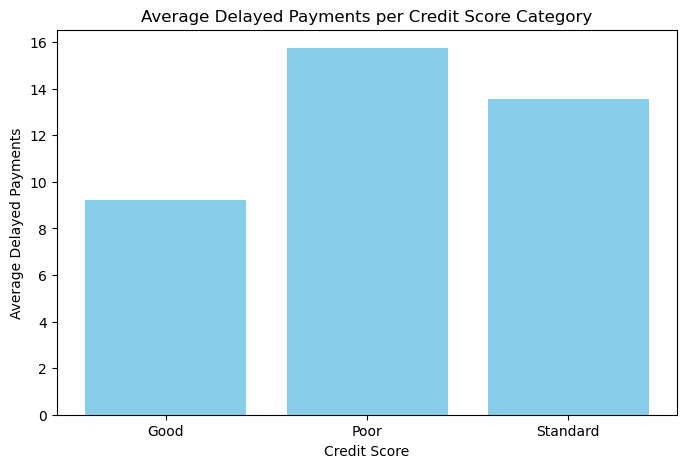

In [189]:
# Visualization
plt.figure(figsize=(8,5))
plt.bar(grouped_data["credit_score"], grouped_data["num_of_delayed_payment"], color='skyblue')
plt.xlabel("Credit Score")
plt.ylabel("Average Delayed Payments")
plt.title("Average Delayed Payments per Credit Score Category")
plt.savefig("delayed_payments_credit_score.png")
plt.show()

#### 2. What is the relationship between annual income and credit utilization ration


In [190]:
grouped_data = df.groupby("credit_score")[["annual_income", "credit_utilization_ratio"]].mean().reset_index()
grouped_data

C:\Users\Client\AppData\Local\Temp\ipykernel_11496\2616346777.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby("credit_score")[["annual_income", "credit_utilization_ratio"]].mean().reset_index()


,credit_score,annual_income,credit_utilization_ratio
0,Good,58329.875717,32.685141
1,Poor,39140.576770,31.986146
2,Standard,48378.179078,32.296724


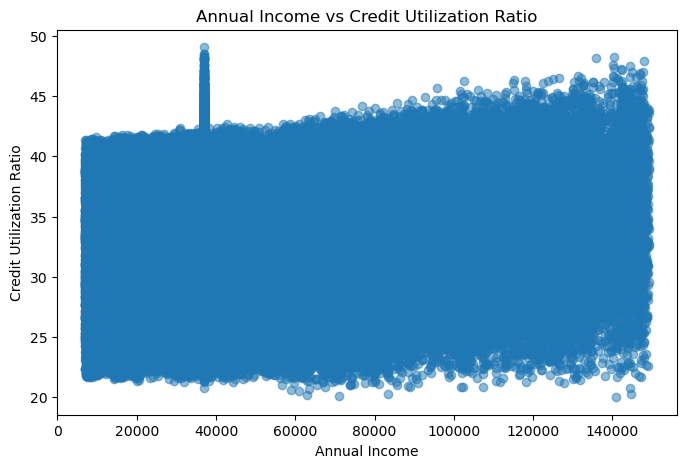

In [191]:
# Visualization
plt.figure(figsize=(8,5))
plt.scatter(df["annual_income"], df["credit_utilization_ratio"], alpha=0.5)
plt.xlabel("Annual Income")
plt.ylabel("Credit Utilization Ratio")
plt.title("Annual Income vs Credit Utilization Ratio")
plt.savefig("income_vs_credit_utilization.png")
plt.show()

#### 3. How does occupation affect the number of credit cards owned?

In [192]:
grouped_data = df.groupby("occupation")["num_credit_card"].mean().reset_index()
grouped_data

C:\Users\Client\AppData\Local\Temp\ipykernel_11496\1869215637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby("occupation")["num_credit_card"].mean().reset_index()


,occupation,num_credit_card
0,Accountant,5.542748
1,Architect,5.441780
2,Developer,5.602281
3,Doctor,5.485078
4,Engineer,5.517883
5,Entrepreneur,5.561281
6,Journalist,5.567968
7,Lawyer,5.510467
8,Manager,5.469297
9,Mechanic,5.461360


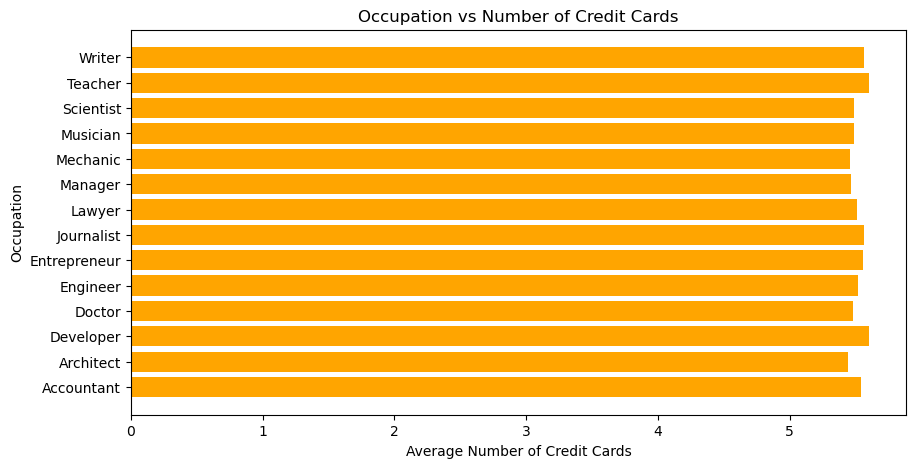

In [193]:
# Visualization
plt.figure(figsize=(10,5))
plt.barh(grouped_data["occupation"], grouped_data["num_credit_card"], color='orange')
plt.xlabel("Average Number of Credit Cards")
plt.ylabel("Occupation")
plt.title("Occupation vs Number of Credit Cards")
plt.savefig("occupation_vs_credit_cards.png")
plt.show()

#### 4. What factors contribute most to a high outstanding debt?

In [194]:
correlation_matrix = df[["outstanding_debt", "annual_income", "num_credit_card", "total_emi_per_month", "credit_utilization_ratio"]].corr()
correlation_matrix

,outstanding_debt,annual_income,num_credit_card,total_emi_per_month,credit_utilization_ratio
outstanding_debt,1.000000,-0.237411,0.433479,0.133504,-0.069900
annual_income,-0.237411,1.000000,-0.192994,0.396645,0.141484
num_credit_card,0.433479,-0.192994,1.000000,0.100902,-0.055385
total_emi_per_month,0.133504,0.396645,0.100902,1.000000,0.009846
credit_utilization_ratio,-0.069900,0.141484,-0.055385,0.009846,1.000000


#### 5. What is the impact of credit history age on credit score?

In [195]:
grouped_data = df.groupby("credit_score")["credit_history_age"].mean().reset_index()
grouped_data

C:\Users\Client\AppData\Local\Temp\ipykernel_11496\3092509104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby("credit_score")["credit_history_age"].mean().reset_index()


,credit_score,credit_history_age
0,Good,26.0
1,Poor,26.0
2,Standard,26.0


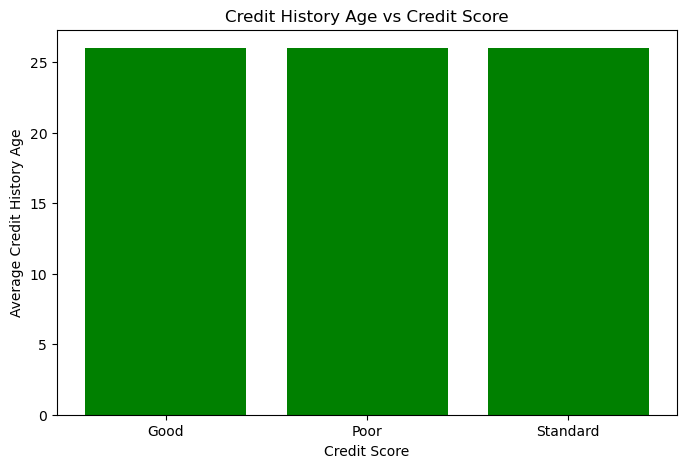

In [196]:
# Visualization
plt.figure(figsize=(8,5))
plt.bar(grouped_data["credit_score"], grouped_data["credit_history_age"], color='green')
plt.xlabel("Credit Score")
plt.ylabel("Average Credit History Age")
plt.title("Credit History Age vs Credit Score")
plt.savefig("credit_history_vs_credit_score.png")
plt.show()

#### 6. Does having multiple bank accounts affect monthly balance?

In [197]:
grouped_data = df.groupby("num_bank_accounts")["monthly_balance"].mean().reset_index()
grouped_data

,num_bank_accounts,monthly_balance
0,0,397.482266
1,1,391.479463
2,2,396.255426
3,3,381.892709
4,4,379.297454
5,5,373.122709
6,6,333.730520
7,7,333.020761
8,8,335.728512
9,9,293.026128


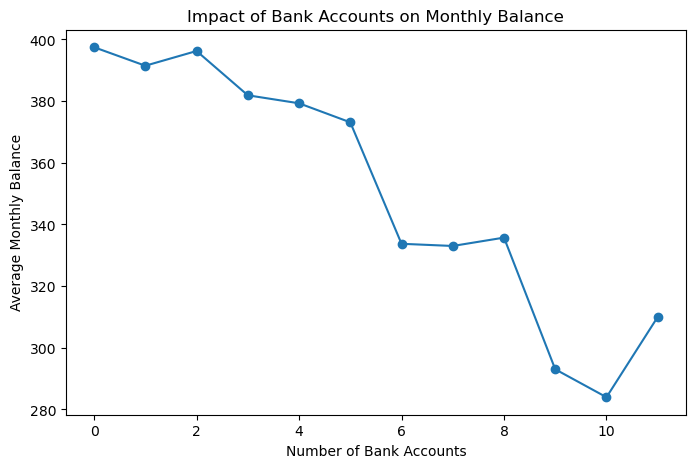

In [198]:
# Visualization
plt.figure(figsize=(8,5))
plt.plot(grouped_data["num_bank_accounts"], grouped_data["monthly_balance"], marker='o', linestyle='-')
plt.xlabel("Number of Bank Accounts")
plt.ylabel("Average Monthly Balance")
plt.title("Impact of Bank Accounts on Monthly Balance")
plt.savefig("bank_accounts_vs_balance.png")
plt.show()

## model 

### encode

In [22]:
def get_object_columns(df):
    """
    Returns a list of column names with 'object' data type in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
    
    Returns:
        list: List of column names with 'object' type.
    """
    return df.select_dtypes(include=['category','object']).columns.tolist()

# ----- Example Usage -----
# df = pd.read_csv('your_file.csv')
object_columns = get_object_columns(df)
print(len(object_columns), "\n", object_columns)

11 
 ['id', 'customer_id', 'month', 'name', 'ssn', 'occupation', 'type_of_loan', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'credit_score']


In [23]:
df.set_index(['id', 'customer_id', 'name', 'ssn'], inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, columns=object_columns, verbose=True):
    """
    Performs Label Encoding on specified categorical columns.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to encode.
        columns (list): List of column names to be label encoded.
        verbose (bool): If True, displays the label mappings.
        
    Returns:
        pd.DataFrame: DataFrame with encoded columns.
    """
    # Loop through the specified columns and encode them
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            
            # Display label mapping
            if verbose:
                mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                print(f"\n[INFO] Label Encoding for '{col}': {mapping}")
        else:
            print(f"[WARNING] Column '{col}' not found in DataFrame.")
    
    return df
df=label_encode_columns(df, columns=object_columns, verbose=True)

[WARNING] Column 'id' not found in DataFrame.
[WARNING] Column 'customer_id' not found in DataFrame.

[INFO] Label Encoding for 'month': {'April': 0, 'August': 1, 'December': 2, 'February': 3, 'January': 4, 'July': 5, 'June': 6, 'March': 7, 'May': 8, 'November': 9, 'October': 10, 'September': 11}
[WARNING] Column 'name' not found in DataFrame.
[WARNING] Column 'ssn' not found in DataFrame.

[INFO] Label Encoding for 'occupation': {'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Musician': 10, 'Scientist': 11, 'Teacher': 12, 'Writer': 13, nan: 14}

[INFO] Label Encoding for 'type_of_loan': {'Auto Loan': 0, 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan': 1, 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan': 2, 'Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not S

### target variable

NameError: name 'df' is not defined

### data split 

In [54]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=20)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import time
import numpy as np

In [56]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the selected columns
x_train = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)
#x_t[columns_to_scale] = scaler.fit_transform(x_t[columns_to_scale])
#x_te[columns_to_scale] = scaler.fit_transform(x_te[columns_to_scale])

### classification

#### XGBOOST 

In [208]:
import time
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Convert data to XGBoost DMatrix (recommended for performance)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "eval_metric": "rmse",  # Evaluation metric
    "eta": 0.1,  # Learning rate
    "max_depth": 6,  # Tree depth
    "subsample": 0.8,  # Row sampling
    "colsample_bytree": 0.8,  # Feature sampling
    "lambda": 1.0,  # L2 regularization
}

# Timing the training process
training_start = time.perf_counter()
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
training_end = time.perf_counter()

# Timing the prediction process
prediction_start = time.perf_counter()
y_pred_train = xgb_model.predict(dtrain)
y_pred_test = xgb_model.predict(dtest)
prediction_end = time.perf_counter()

# Compute metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

train_time = training_end - training_start
prediction_time = prediction_end - prediction_start

# Output results
print("\n XGBoost Regression Model Performance:")

print("\nTraining Set:")
print(f"  - RMSE: {rmse_train:.4f}")
print(f"  - MAE: {mae_train:.4f}")
print(f"  - R² Score: {r2_train:.4f}")
print(f"  - Training Time: {train_time:.4f} seconds")

print("\nTesting Set:")
print(f"  - RMSE: {rmse_test:.4f}")
print(f"  - MAE: {mae_test:.4f}")
print(f"  - R² Score: {r2_test:.4f}")
print(f"  - Prediction Time: {prediction_time:.5f} seconds")



 XGBoost Regression Model Performance:

Training Set:
  - RMSE: 0.5083
  - MAE: 0.3449
  - R² Score: 0.4649
  - Training Time: 3.6755 seconds

Testing Set:
  - RMSE: 0.6422
  - MAE: 0.4548
  - R² Score: 0.1472
  - Prediction Time: 0.25403 seconds


#### logistic regression 

In [209]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Initialize Logistic Regression model
clf = LogisticRegression(max_iter=1000)

# Timing the training process
training_start = time.perf_counter()
clf.fit(x_train, y_train)
training_end = time.perf_counter()

# Timing the prediction process
prediction_start = time.perf_counter()
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
prediction_end = time.perf_counter()

# Compute classification metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

recall_train = recall_score(y_train, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
# Time metrics
train_time = training_end - training_start
prediction_time = prediction_end - prediction_start
# Output metrics
print("Logistic Regression Model Performance:")

print("\n Training Set:")
print(f"  - Accuracy: {accuracy_train:.4f}")
print(f"  - Precision: {precision_train:.4f}")
print(f"  - Recall: {recall_train:.4f}")
print(f"  - F1 Score: {f1_train:.4f}")
print(f"  - Training Time: {train_time:.4f} seconds")

print("\n Testing Set:")
print(f"  - Accuracy: {accuracy_test:.4f}")
print(f"  - Precision: {precision_test:.4f}")
print(f"  - Recall: {recall_test:.4f}")
print(f"  - F1 Score: {f1_test:.4f}")
print(f"  - Prediction Time: {prediction_time:.5f} seconds")

# Confusion Matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Logistic Regression Model Performance:

 Training Set:
  - Accuracy: 0.6993
  - Precision: 0.6638
  - Recall: 0.6993
  - F1 Score: 0.6553
  - Training Time: 1.9569 seconds

 Testing Set:
  - Accuracy: 0.6979
  - Precision: 0.6618
  - Recall: 0.6979
  - F1 Score: 0.6546
  - Prediction Time: 0.05277 seconds

 Confusion Matrix:
[[  718    33  2824]
 [   99  1421  4277]
 [  589  1241 18798]]


### SVM

In [4]:
import time
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x= df.drop(columns='credit_score')
y= df['credit_score']
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Initialize SVM model with RBF kernel
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Timing the training process
training_start = time.perf_counter()
svm_clf.fit(x_train, y_train)
training_end = time.perf_counter()

# Timing the prediction process
prediction_start = time.perf_counter()
y_pred_train_svm = svm_clf.predict(x_train)
y_pred_test_svm = svm_clf.predict(x_test)
prediction_end = time.perf_counter()

# Compute classification metrics for SVM
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

precision_train_svm = precision_score(y_train, y_pred_train_svm, average='weighted', zero_division=0)
precision_test_svm = precision_score(y_test, y_pred_test_svm, average='weighted', zero_division=0)

recall_train_svm = recall_score(y_train, y_pred_train_svm, average='weighted', zero_division=0)
recall_test_svm = recall_score(y_test, y_pred_test_svm, average='weighted', zero_division=0)

f1_train_svm = f1_score(y_train, y_pred_train_svm, average='weighted', zero_division=0)
f1_test_svm = f1_score(y_test, y_pred_test_svm, average='weighted', zero_division=0)

# Time metrics
train_time_svm = training_end - training_start
prediction_time_svm = prediction_end - prediction_start

# Output metrics for SVM
print("Support Vector Machine (SVM) Model Performance:")
print("\n Training Set:")
print(f"  - Accuracy: {accuracy_train_svm:.4f}")
print(f"  - Precision: {precision_train_svm:.4f}")
print(f"  - Recall: {recall_train_svm:.4f}")
print(f"  - F1 Score: {f1_train_svm:.4f}")
print(f"  - Training Time: {train_time_svm:.4f} seconds")

print("\n Testing Set:")
print(f"  - Accuracy: {accuracy_test_svm:.4f}")
print(f"  - Precision: {precision_test_svm:.4f}")
print(f"  - Recall: {recall_test_svm:.4f}")
print(f"  - F1 Score: {f1_test_svm:.4f}")
print(f"  - Prediction Time: {prediction_time_svm:.5f} seconds")

# Confusion Matrix for SVM
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_svm))


NameError: name 'df' is not defined